In [88]:
import tensorflow

In [89]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import load_model
import numpy as np

In [90]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [91]:
x_train = train_datagen.flow_from_directory(r'D:\dataset\10253', target_size=(64, 64), class_mode='binary', batch_size=32,)
x_test = train_datagen.flow_from_directory(r'D:\dataset\10276', target_size=(64, 64), class_mode='binary', batch_size=32,)

Found 103 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [92]:
model=Sequential()

In [108]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          786496    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 40)                10280     
                                                                 
 dense_9 (Dense)             (None, 1)                 41        
                                                                 
Total params: 796817 (3.04 MB)
Trainable params: 796817 (3.04 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [117]:
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(75,75,3)))

ValueError: Input 0 of layer "conv2d_7" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)

In [118]:
model.add(MaxPooling2D(pool_size=(2,2)))

ValueError: Input 0 of layer "max_pooling2d_7" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 1)

In [119]:
model.add(Flatten())

In [120]:
model.add(Dense(units=40,kernel_initializer='uniform',activation='relu'))

In [121]:
model.add(Dense(units=1,kernel_initializer='uniform',activation='softmax'))

In [122]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [123]:
model.fit(x_train,
                    steps_per_epoch = len(x_train),
                    epochs = 10,
                    validation_data =(x_test,y_test),
                    validation_steps = len(x_test))

NameError: name 'y_test' is not defined

In [124]:
model.save("breastcancer.h5")

In [125]:
model = load_model("breastcancer.h5")

In [126]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

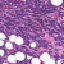

In [127]:
img = image.load_img(r"D:\dataset\10253\1\10253_idx5_x651_y301_class1.png", target_size = (64, 64))
img

In [128]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)


In [129]:
pred = np.argmax(model.predict(x), axis=-1)


ValueError: in user code:

    File "C:\Users\lhari\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\lhari\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lhari\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\lhari\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\lhari\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\lhari\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 75, 75, 3), found shape=(None, 64, 64, 3)


In [130]:
pred

NameError: name 'pred' is not defined